In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [ ]:
#here reference is not adjusted
# df=pd.read_csv('Iteration8.csv')
# df = df.drop(df.columns[-1], axis=1)
# x=np.empty(250,)
# c=0
# for i in range(50000,300000,1000):
#   x[c]=i
#   c+=1

# col=0
# cnt=1
# y=np.empty((250,0))
# #remember python range is exclusive on the last value
# for i in range(0,29):
#   y=[]
#   col=0
#   for j in range(50000,299001,1000):
#        y.append(df.iloc[cnt:cnt+500,col].median())
#       #  if(col<249):
#        col+=1
#   cnt+=500
#   plt.plot(x,y,linestyle='-',marker='.',markevery=10,linewidth=1,label='Cell{}'.format(i))
#   plt.title('Iteration8')
#   plt.legend()
# plt.show()


In [ ]:
df=pd.read_csv('Iteration5.csv')
df = df.drop(df.columns[-1], axis=1)
x=np.empty(250,)
c=0
for i in range(50000,300000,1000):
  x[c]=i
  c+=1
# Calculating the ref
ref=[]
refcnt=0
for j in range(0,250):
  ref.append(df.iloc[0:500,j].median())
print(ref)
col=0
cnt=1
y=np.empty((250,0))
#remember python range is exclusive on the last value
for i in range(0,29):
  y=[]
  col=0
  for j in range(50000,299001,1000):
       y.append(df.iloc[cnt:cnt+500,col].median()-ref[col])
      #  if(col<249):
       col+=1
  cnt+=500
  plt.plot(x,y,linestyle='-',marker='.',markevery=10,linewidth=1,label='Cell{}'.format(i))
  plt.title('Iteration5')
  plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Iteration5.csv'

With respect to Distance

In [ ]:
# df=pd.read_csv('Iteration1.csv')
# df = df.drop(df.columns[-1], axis=1)
# x=np.empty(250,)
# c=0
# for i in range(50000,300000,1000):
#   x[c]=i
#   c+=1
# # Calculating the ref
# ref=[]
# refcnt=0
# for j in range(0,250):
#   ref.append(df.iloc[0:500,j].median())
# print(ref)
# col=0
# cnt=1
# y=np.empty((250,0))
# #remember python range is exclusive on the last value
# for i in range(0,29):
#   y=[]
#   col=0
#   for j in range(50000,299001,1000):
#        y.append(df.iloc[cnt:cnt+500,col].median()-ref[col])
#        col+=1
#   cnt+=500
# y_x={}
# q=0
# for y_value in y:
#   y_x[y_value]=x[q]
#   q+=1
# print("key value pairs in y_x")
# for key,value in y_x.items():
#   print(key,value)
#function to calculate distances
def distance(cell_no,a,b):#a is the scaling factor along the the shorter side and
#b is the scaling factor along the longer side
  origin_x=(29/4)*b
  origin_y=(1/2)*a
  if(cell_no%7!=0):
      pseudo_cell_no=cell_no%7#this is the cell number in a particular row
  else:
    pseudo_cell_no=7
  global add
  if(cell_no%7==1):
    #row change=>y coordinate changes=>add term changes
    add=math.pow(((4-(cell_no%6))*a),2)
  # print("At cell {} the value of add is {}".format(cell_no, add))
  # print("Pseudo cell no {} for actual cell no {}".format(pseudo_cell_no,cell_no))
  dist=math.sqrt((math.pow(((((2*pseudo_cell_no-1)*b)/2)-origin_x),2))+add)
  return dist

x=np.empty(29,)
for i in range(0,29):
  if(i==0):
     x[i]=float('inf')#for the reference, x is set to a very large value
  else:
    x[i]=distance(i,1,1)#Scaling factors taken: a=1,b=1
print("Cell No:Distance")
for i in range(0,29):
  print(i,":",x[i])
# print(x)

# arr=[1,2,3,5,6,7,8]
for k in range(1,2):
  if(k==4):
    continue
  df=pd.read_csv('Iteration{}.csv'.format(k))
  df = df.drop(df.columns[-1], axis=1)
  for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Calculating the ref
  ref=[]
  refcnt=0
  for j in range(0,250):
     ref.append(df.iloc[0:500,j].median())
  # print(ref)
  col=0
  cnt=1
  y=np.empty((250,0))
  max_amp1_arr=[]
  max_amp2_arr=[]
  min_amp_arr=[]
  fmax1_arr=[]
  fmax2_arr=[]
  fmin_arr=[]
  max1_by_freq_arr=[]
  max2_by_freq_arr=[]
  min_by_freq_arr=[]
  fmax1=0
  fmax2=0
  fmin=0
  max_amp1=0
  max_amp2=0
  min_amp=0
  for i in range(0,29):
     y=[]
     col=0
     for j in range(50000,299001,1000):
        y.append(df.iloc[cnt:cnt+500,col].median()-ref[col])
        col+=1
    #  print("Printing y vals")
    #  for y_val in y:
    #   print(y_val)
     min_amp=min(y)
     fmin=y.index(min_amp)*1000+50000
     min_by_freq_arr.append(min_amp/fmin)
     fmin_arr.append(fmin)
     min_amp_arr.append(min_amp)

     max_amp1=max(y)#finding the maximum median amplitude of that particular cell
     fmax1=y.index(max_amp1)

     del y[fmax1]#deleting the first max to find the second max
     fmax1=fmax1*1000+50000
     max1_by_freq_arr.append(max_amp1/fmax1)

     max_amp2=max(y)
     fmax2=(y.index(max_amp2)+1)*1000+50000
     max2_by_freq_arr.append(max_amp2/fmax2)

     max_amp1_arr.append(max_amp1)
     max_amp2_arr.append(max_amp2)
     fmax1_arr.append(fmax1)
     fmax2_arr.append(fmax2)
     cnt+=500
  # print(x)
  print("Printing max_vals across all cells")
  print(max_amp1_arr)
  # print(fmax2_arr)
  # plt.plot(x,min_by_freq_arr,linestyle='-',marker='.',markevery=10,linewidth=1,label='Iteration{}'.format(k))
  plt.scatter(x,max_amp2_arr)
  plt.title('maxima amp1 vs distance')
  plt.legend()
  plt.xlabel("Distance")
  plt.ylabel("maxima1 Median Amplitude")

plt.show()

In [ ]:
#cell_no_array
cell_no_arr=[]
for i in range(0,29):
  cell_no_arr.append(i)
print("Printing cell no arr")
print(cell_no_arr)
#function to calculate distances
def distance(cell_no,a,b):#a is the scaling factor along the the shorter side and
#b is the scaling factor along the longer side
  origin_x=(29/4)*b
  origin_y=(1/2)*a
  if(cell_no%7!=0):
      pseudo_cell_no=cell_no%7#this is the cell number in a particular row
  else:
    pseudo_cell_no=7
  global add
  if(cell_no%7==1):
    #row change=>y coordinate changes=>add term changes
    add=math.pow(((4-(cell_no%6))*a),2)
  # print("At cell {} the value of add is {}".format(cell_no, add))
  # print("Pseudo cell no {} for actual cell no {}".format(pseudo_cell_no,cell_no))
  dist=math.sqrt((math.pow(((((2*pseudo_cell_no-1)*b)/2)-origin_x),2))+add)
  return dist

x=np.empty(29,)
for i in range(0,29):
  if(i==0):
     x[i]=float('inf')#for the reference, x is set to a very large value
  else:
    x[i]=distance(i,1,1)#Scaling factors taken: a=1,b=1
print("Cell No:Distance")
for i in range(0,29):
  print(i,":",x[i])
# print(x)

# arr=[1,2,3,5,6,7,8]
for k in range(1,2):
  if(k==4):
    continue
  df=pd.read_csv('Iteration{}.csv'.format(k))
  df = df.drop(df.columns[-1], axis=1)
  for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Calculating the ref
  ref=[]
  refcnt=0
  for j in range(0,250):
     ref.append(df.iloc[0:500,j].median())
  # print(ref)
  col=0
  cnt=1
  y=np.empty((250,0))
  max_amp1_arr=[]
  max_amp2_arr=[]
  min_amp_arr=[]
  fmax1_arr=[]
  fmax2_arr=[]
  fmin_arr=[]
  max1_by_freq_arr=[]
  max2_by_freq_arr=[]
  min_by_freq_arr=[]
  fmax1=0
  fmax2=0
  fmin=0
  max_amp1=0
  max_amp2=0
  min_amp=0
  for i in range(0,29):
     y=[]
     col=0
     for j in range(50000,299001,1000):
        y.append(df.iloc[cnt:cnt+500,col].median()-ref[col])
        col+=1
    #  print("Printing y vals")
    #  for y_val in y:
    #   print(y_val)
     min_amp=min(y)
     fmin=y.index(min_amp)*1000+50000
     min_by_freq_arr.append(min_amp/fmin)
     fmin_arr.append(fmin)
     min_amp_arr.append(min_amp)

     max_amp1=max(y)#finding the maximum median amplitude of that particular cell
     fmax1=y.index(max_amp1)

     del y[fmax1]#deleting the first max to find the second max
     fmax1=fmax1*1000+50000
     max1_by_freq_arr.append(max_amp1/fmax1)

     max_amp2=max(y)
     fmax2=(y.index(max_amp2)+1)*1000+50000
     max2_by_freq_arr.append(max_amp2/fmax2)

     max_amp1_arr.append(max_amp1)
     max_amp2_arr.append(max_amp2)
     fmax1_arr.append(fmax1)
     fmax2_arr.append(fmax2)
     cnt+=500
  # print(x)
  print("Printing max_vals across all cells")
  print(max_amp1_arr)
  # data={}
  print("*********")
  print(len(max_amp1_arr))
  print(len(cell_no_arr))
  print(len(x))
  df = pd.DataFrame({'cell_no': cell_no_arr, 'distance': x, 'Max_amp1': max_amp1_arr})
  sorted_df = df.sort_values(by='distance',ascending=False)
  sorted_df.to_csv('data.csv', index=False)
  cell_no_x_axis=sorted_df['cell_no'].to_numpy()
  print(cell_no_x_axis)
  distance_cell=sorted_df['distance'].to_numpy()
  print(distance_cell)
  max_amp1_y_axis=sorted_df['Max_amp1'].to_numpy()
  print(max_amp1_y_axis)
  # print(sorted_df)
  # print(type(cell_no_x_axis))
  # print(distance)
  # print(max_amp1)
  # print(df)
  # data['Cell No']=cell_no_arr
  # data['Max Amp1']=max_amp1_arr
  # data['distance']=x
  # pd.DataFrame(data).to_csv('Data.csv')
  # print(fmax2_arr)
  # plt.plot(x,min_by_freq_arr,linestyle='-',marker='.',markevery=10,linewidth=1,label='Iteration{}'.format(k))
  # plt.plot(cell_no_x_axis,max_amp1_y_axis,linestyle='-',marker='.',markevery=10,linewidth=1)
  print("x:y")
  x_axis=[]
  y_axis=[]
  for i in range (0,29):
    print(cell_no_x_axis[i],":",max_amp1_y_axis[i])
    x_axis.append(cell_no_x_axis[i])
    y_axis.append(max_amp1_y_axis[i])
  print(x_axis)
  print(y_axis)
  plt.scatter(x_axis, y_axis)
  plt.xticks(ticks=range(len(x_axis)), labels=x_axis, rotation=45)
  plt.title('max_amp vs cell_no')
  plt.legend()
  plt.xlabel("Cell_no")
  plt.ylabel("maxima1 Median Amplitude")
  fig = plt.gcf()
  fig.set_size_inches(20, 5)

plt.show()

In [ ]:

#cell_no_array
cell_no_arr=[]
for i in range(0,29):
  cell_no_arr.append(i)
print("Printing cell no arr")
print(cell_no_arr)
#function to calculate distances
def distance(cell_no,a,b):#a is the scaling factor along the the shorter side and
#b is the scaling factor along the longer side
  origin_x=(29/4)*b
  origin_y=(1/2)*a
  if(cell_no%7!=0):
      pseudo_cell_no=cell_no%7#this is the cell number in a particular row
  else:
    pseudo_cell_no=7
  global add
  if(cell_no%7==1):
    #row change=>y coordinate changes=>add term changes
    add=math.pow(((4-(cell_no%6))*a),2)
  # print("At cell {} the value of add is {}".format(cell_no, add))
  # print("Pseudo cell no {} for actual cell no {}".format(pseudo_cell_no,cell_no))
  dist=math.sqrt((math.pow(((((2*pseudo_cell_no-1)*b)/2)-origin_x),2))+add)
  return dist

x=np.empty(29,)
for i in range(0,29):
  if(i==0):
     x[i]=float('inf')#for the reference, x is set to a very large value
  else:
    x[i]=distance(i,1,1)#Scaling factors taken: a=1,b=1
print("Cell No:Distance")
for i in range(0,29):
  print(i,":",x[i])
# print(x)

# arr=[1,2,3,5,6,7,8]
for k in range(2,3):
  if(k==4):
    continue
  df=pd.read_csv('{}.csv'.format(k))
  df = df.drop(df.columns[-1], axis=1)
  for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Calculating the ref
  ref=[]
  refcnt=0
  for j in range(0,250):
     ref.append(df.iloc[0:500,j].median())
  # print(ref)
  col=0
  cnt=1
  y=np.empty((250,0))
  max_amp1_arr=[]
  max_amp2_arr=[]
  min_amp_arr=[]
  fmax1_arr=[]
  fmax2_arr=[]
  fmin_arr=[]
  max1_by_freq_arr=[]
  max2_by_freq_arr=[]
  min_by_freq_arr=[]
  fmax1=0
  fmax2=0
  fmin=0
  max_amp1=0
  max_amp2=0
  min_amp=0
  for i in range(0,29):
     y=[]
     col=0
     for j in range(50000,299001,1000):
        y.append(df.iloc[cnt:cnt+500,col].median()-ref[col])
        col+=1
     min_amp=min(y)
     fmin=y.index(min_amp)*1000+50000
     min_by_freq_arr.append(min_amp/fmin)
     fmin_arr.append(fmin)
     min_amp_arr.append(min_amp)

     max_amp1=max(y)#finding the maximum median amplitude of that particular cell
     fmax1=y.index(max_amp1)

     del y[fmax1]#deleting the first max to find the second max
     fmax1=fmax1*1000+50000
     max1_by_freq_arr.append(max_amp1/fmax1)

     max_amp2=max(y)
     fmax2=(y.index(max_amp2)+1)*1000+50000
     max2_by_freq_arr.append(max_amp2/fmax2)

     max_amp1_arr.append(max_amp1)
     max_amp2_arr.append(max_amp2)
     fmax1_arr.append(fmax1)
     fmax2_arr.append(fmax2)
     cnt+=500
  # print(x)
  print("Printing max_vals across all cells")
  print(max_amp1_arr)
  data2={}
  print("*********")
  data2["Max_amp1"]=max_amp1_arr
  data2["distance"]=x
  data2["Cell_No"]=cell_no_arr
  df=pd.DataFrame(data2)
  sorted_df = df.sort_values(by='distance',ascending=False)
  sorted_df.to_csv('data2.csv', index=False)
  cell_no=sorted_df['Cell_No'].to_numpy()
  cell_no_x_axis=[]
  for cell in cell_no:
    cell_no_x_axis.append("C_{}".format(cell))
  print(cell_no_x_axis)
  distance_cell=sorted_df['distance'].to_numpy()
  print(distance_cell)
  max_amp1_y_axis=sorted_df['Max_amp1'].to_numpy()
  print(max_amp1_y_axis)
  print("x:y")
  x_axis=[]
  y_axis=[]
  for i in range (0,29):
    print(cell_no_x_axis[i],":",max_amp1_y_axis[i])
    x_axis.append(cell_no_x_axis[i])
    y_axis.append(max_amp1_y_axis[i])
  print(x_axis)
  print(y_axis)
  plt.stem(x_axis, y_axis)
  # plt.xticks(ticks=range(len(x_axis)), labels=x_axis, rotation=45)
  plt.title('max_amp vs cell_no')
  plt.legend()
  plt.xlabel("Cell_no")
  plt.ylabel("maxima1 Median Amplitude")
  fig = plt.gcf()
  fig.set_size_inches(20, 5)

plt.show()

<ipython-input-5-5b69433178ab>:41: DtypeWarning: Columns (288,319) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('{}.csv'.format(k))


*********
******************************************


<ipython-input-5-5b69433178ab>:41: DtypeWarning: Columns (10,314,315) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('{}.csv'.format(k))


*********
******************************************
*********
******************************************
*********
******************************************
*********
******************************************


<ipython-input-5-5b69433178ab>:41: DtypeWarning: Columns (314) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('{}.csv'.format(k))


*********
******************************************
[5.000e-01 7.135e+02 6.240e+02 6.965e+02 6.410e+02 5.375e+02 5.710e+02
 6.575e+02 5.910e+02 5.030e+02 5.620e+02 3.735e+02 5.165e+02 6.620e+02
 6.000e+02 5.840e+02 5.750e+02 5.520e+02 6.420e+02 7.095e+02 6.450e+02
 7.360e+02 6.575e+02 5.535e+02 6.865e+02 7.265e+02 6.450e+02 6.505e+02
 6.730e+02]
[  0.5 228.5 161.  212.  171.5 224.   83.  216.  200.  227.  179.  222.
 220.5 254.  171.  196.  214.  244.5 231.  197.  192.  201.  209.  174.
 218.  184.  220.5 171.  236. ]
[  1.  175.5 178.  222.5 223.5 182.5 180.5 198.5 221.5 182.  182.5 221.5
 182.  214.  183.5 181.5 221.5 202.5 181.5 182.5 188.  218.  218.5 179.
 179.  223.5 224.  216.  178.5]
[  1.5 160.  164.5 161.5 169.  157.5 164.5 164.  167.  154.  161.5 144.5
 150.5 167.5 161.  148.  145.  153.  164.5 162.  162.  154.  168.  162.
 157.  154.  138.5 155.  147.5]
[  0.5 168.  128.  137.  118.  131.   16.  136.  126.  134.   43.  136.
 129.  150.   62.  129.  133.  133.  131.   56.  

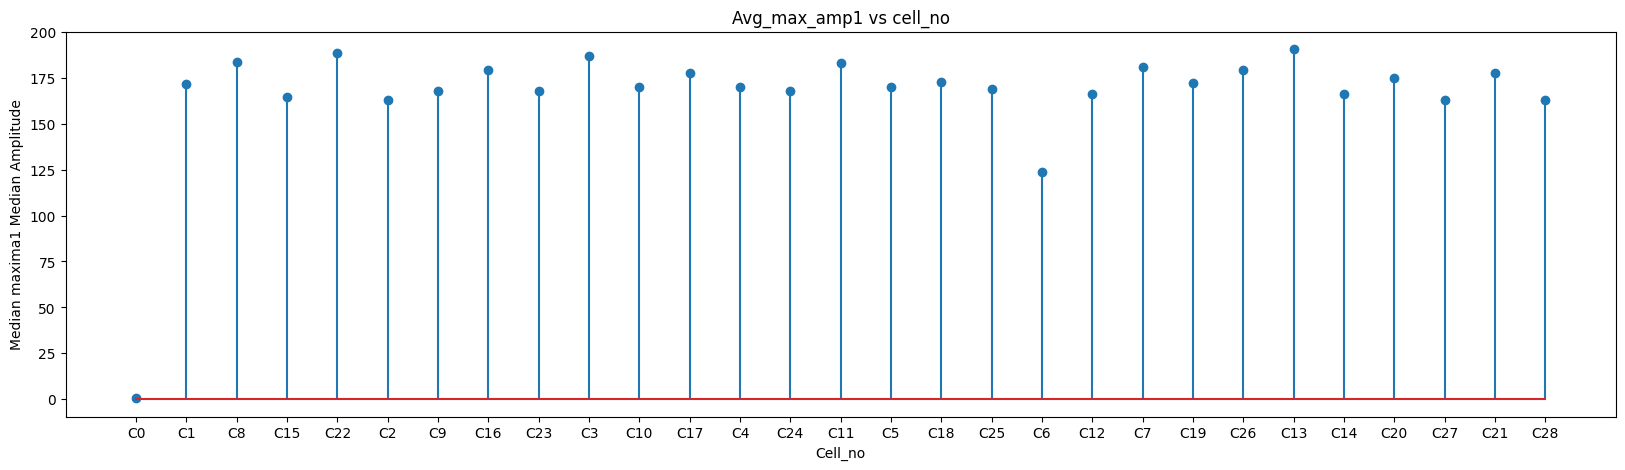

In [ ]:
y_across_it=[]#to store y_values
#cell_no_array
cell_no_arr=[]
for i in range(0,29):
  cell_no_arr.append("C{}".format(i))
# print("Printing cell no arr")
# print(cell_no_arr)
#function to calculate distances
def distance(cell_no,a,b):#a is the scaling factor along the the shorter side and
#b is the scaling factor along the longer side
  origin_x=(29/4)*b
  origin_y=(1/2)*a
  if(cell_no%7!=0):
      pseudo_cell_no=cell_no%7#this is the cell number in a particular row
  else:
    pseudo_cell_no=7
  global add
  if(cell_no%7==1):
    #row change=>y coordinate changes=>add term changes
    add=math.pow(((4-(cell_no%6))*a),2)
  # print("At cell {} the value of add is {}".format(cell_no, add))
  # print("Pseudo cell no {} for actual cell no {}".format(pseudo_cell_no,cell_no))
  dist=math.sqrt((math.pow(((((2*pseudo_cell_no-1)*b)/2)-origin_x),2))+add)
  return dist

x=np.empty(29,)
for i in range(0,29):
  if(i==0):
     x[i]=float('inf')#for the reference, x is set to a very large value
  else:
    x[i]=distance(i,1,1)#Scaling factors taken: a=1,b=1
# print("Cell No:Distance")
# for i in range(0,29):
#   print(i,":",x[i])
# print(x)

# arr=[1,2,3,5,6,7,8]
for k in range(1,8):
  if(k==4):
    continue
  df=pd.read_csv('{}.csv'.format(k))
  df = df.drop(df.columns[-1], axis=1)
  for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Calculating the ref
  ref=[]
  refcnt=0
  for j in range(0,250):
     ref.append(df.iloc[0:500,j].median())
  # print(ref)
  col=0
  cnt=1
  y=np.empty((250,0))
  max_amp1_arr=[]
  max_amp2_arr=[]
  min_amp_arr=[]
  fmax1_arr=[]
  fmax2_arr=[]
  fmin_arr=[]
  max1_by_freq_arr=[]
  max2_by_freq_arr=[]
  min_by_freq_arr=[]
  fmax1=0
  fmax2=0
  fmin=0
  max_amp1=0
  max_amp2=0
  min_amp=0
  for i in range(0,29):
     y=[]
     col=0
     for j in range(50000,299001,1000):
        y.append(df.iloc[cnt:cnt+500,col].median()-ref[col])
        col+=1
     min_amp=min(y)
     fmin=y.index(min_amp)*1000+50000
     min_by_freq_arr.append(min_amp/fmin)
     fmin_arr.append(fmin)
     min_amp_arr.append(min_amp)

     max_amp1=max(y)#finding the maximum median amplitude of that particular cell
     fmax1=y.index(max_amp1)

     del y[fmax1]#deleting the first max to find the second max
     fmax1=fmax1*1000+50000
     max1_by_freq_arr.append(max_amp1/fmax1)

     max_amp2=max(y)
     fmax2=(y.index(max_amp2)+1)*1000+50000
     max2_by_freq_arr.append(max_amp2/fmax2)

     max_amp1_arr.append(max_amp1)
     max_amp2_arr.append(max_amp2)
     fmax1_arr.append(fmax1)
     fmax2_arr.append(fmax2)
     cnt+=500
  # print("Printing max_vals across all cells")
  # print(max_amp1_arr)
  filename="data{}.csv".format(k)
  # data={}
  data2={}
  print("*********")
  data2["Max_amp1"]=max_amp1_arr
  data2["distance"]=x
  data2["Cell_No"]=cell_no_arr
  df=pd.DataFrame(data2)
  sorted_df = df.sort_values(by='distance',ascending=False)
  sorted_df.to_csv(filename, index=False)
  cell_no_x_axis=sorted_df['Cell_No'].tolist()
  # print(cell_no_x_axis)
  distance_cell=sorted_df['distance'].to_numpy()
  # print(distance_cell)
  max_amp1_y_axis=sorted_df['Max_amp1'].to_numpy()
  # print(max_amp1_y_axis)
  y_across_it.append(max_amp1_y_axis)
  print("******************************************")
for ar in y_across_it:
    print(ar)
y_data=pd.DataFrame(y_across_it)
median_values_y=y_data.median()
print(median_values_y)
print(type(median_values_y))
avg_values_y=y_data.mean()
print(avg_values_y)
y_data.to_csv('y_data.csv', index=False)
data2={}
data2["Avg_max_amp1"]=avg_values_y
data2["Median_max_amp1"]=median_values_y
data2["distance"]=x
data2["Cell_No"]=cell_no_arr
df=pd.DataFrame(data2)
sorted_df = df.sort_values(by='distance',ascending=False)
sorted_df.to_csv('data2.csv', index=False)
cell_no_x_axis=sorted_df['Cell_No'].tolist()
print(cell_no_x_axis)
distance_cell=sorted_df['distance'].to_numpy()
  # print(distance_cell)
avg_max_amp1_y_axis=sorted_df['Avg_max_amp1'].to_numpy()
median_max_amp1_y_axis=sorted_df['Median_max_amp1'].to_numpy()
  # print(max_amp1_y_axis)
  # print(y_data)
#   plt.stem(x_axis, y_axis)
#   # plt.xticks(ticks=range(len(x_axis)), labels=x_axis, rotation=45)
#   plt.title('max_amp vs cell_no')
#   plt.legend()
#   plt.xlabel("Cell_no")
#   plt.ylabel("maxima1 Median Amplitude")
#   fig = plt.gcf()
#   fig.set_size_inches(20, 5)
plt.stem(cell_no_x_axis, median_max_amp1_y_axis)
plt.xlabel("Cell_no")
plt.ylabel("Median maxima1 Median Amplitude")
plt.title('Avg_max_amp1 vs cell_no')
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()